# Projet 3 - OpenFoodFacts
 Concevez une application au service de la service de la santé publique - Partie 3

## Sommaire

* Présentation de l'application
* Traitement et import des données
* Chargement du dataset
* Préparation des données
        * Création des tables de travail
        * Mise en évidence des correspondances entre nutriscore et nutrigrade

* Création des tables pour l'application
        * Préparation de la table Sportif
        * Préparation de la table Perte de poids
        * Préparation de la table prise de poids
        * Préparation de la table Neutre

* Anova des tables



## Présentation de l'application

Application permettant à un sportif (sport de combat avec catégorie en fonction du poids), selon son programme de poids, d’adapter son alimentation :
>
>
* Un profil sportif : Profil permettant de privilégier la prise musculaire en masse et en endurance peu de temps avant une compétition

** Nutrigrade A, B, C  et avec un nutriscore inférieur à 5
** Nutriments choisis :
** Energy_100g
** Sugars_100g
** Fiber_100g
** Proteins_100g
>
* Un profil perte de poids : Si le poids du sportif est trop élevé

** Nutrigrade A et B avec un nutriscore inférieur à 2
** Nutriments choisis :
** Energy_100g
** Fiber_100g
** Proteins_100g
>
* Un profil prise de poids : Si le poids du sportif est trop faible

** Nutrigrade A, B, C et D avec un nutriscore inférieur à 18
** Nutriments choisis :
** Energy_100g
** Sugars_100g
** Fiber_100g
** Proteins_100g
** Carbohydrates_100g
** Fat_100g
>
* Un profil neutre, pour la vie de tous les jours.

** Nutrigrade complet avec nutriscore complet
** Nutriments choisis :
** Energy_100g
** Sugars_100g
** Fiber_100g
** Proteins_100g
** Carbohydrates_100g
** Fat_100g
>
>
L’utilisateur saisit le profil dans lequel il se trouve, ainsi que le type d’aliment qu’il souhaite consommer en respectant les catégories PNNS (Programme national nutrition santé)
Le choix sera en fonction du nutrigrade et du nutriscore





## Traitement et import des données

In [1]:
# Import des librairies
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Vérification des libairies installées
print('Verification de la mise à jour des librairies utilisées :')
print('Python: {}'.format(sys.version))
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)
print('sklearn       : ' + sklearn.__version__)

Verification de la mise à jour des librairies utilisées :
Python: 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
NumPy         : 1.21.5
Pandas        : 1.4.4
Matplotlib    : 3.5.2
Seaborn       : 0.11.2
sklearn       : 1.0.2


In [2]:
# Réglage de l'affichage de données
pd.set_option('display.max_row',250)
pd.set_option('display.max_column',300)
pd.set_option('display.precision', 5)

## Chargement du dataset

In [3]:
# Importation du jeu de données
data_fr = pd.read_csv('fr_data_clean.csv')

### Nettoyage du dataset

In [4]:
#Nettoyage des produits à 0
products = data_fr[data_fr['product_name']  == '0' ].index
data_fr.drop(products, axis = 0, inplace = True)

## Préparation des données

### Création des tables de travail

In [5]:
data_appli = data_fr[["pnns_groups_2", "nutrition_grade_fr","nutrition_score_fr_100g", "energy_100g", "fat_100g", "saturated_fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "sodium_100g"]]

In [6]:
data_nutri = data_fr[['pnns_groups_2','nutrition_grade_fr','nutrition_score_fr_100g']]

### Mise en évidence des correspondances entre nutrition_score et nutrition_grade

In [7]:
# Mesure de la correspondance entre nutrition_score et nutrition_grade
pd.crosstab(data_appli['nutrition_score_fr_100g'], data_appli['nutrition_grade_fr'])

nutrition_grade_fr,a,b,c,d,e
nutrition_score_fr_100g,,,,,
-15.0,1,0,0,0,0
-14.0,4,0,0,0,0
-13.0,15,0,0,0,0
-12.0,28,0,0,0,0
-11.0,61,0,0,0,0
-10.0,95,0,0,0,0
-9.0,140,0,0,0,0
-8.0,196,1,0,0,0
-7.0,331,0,0,0,0


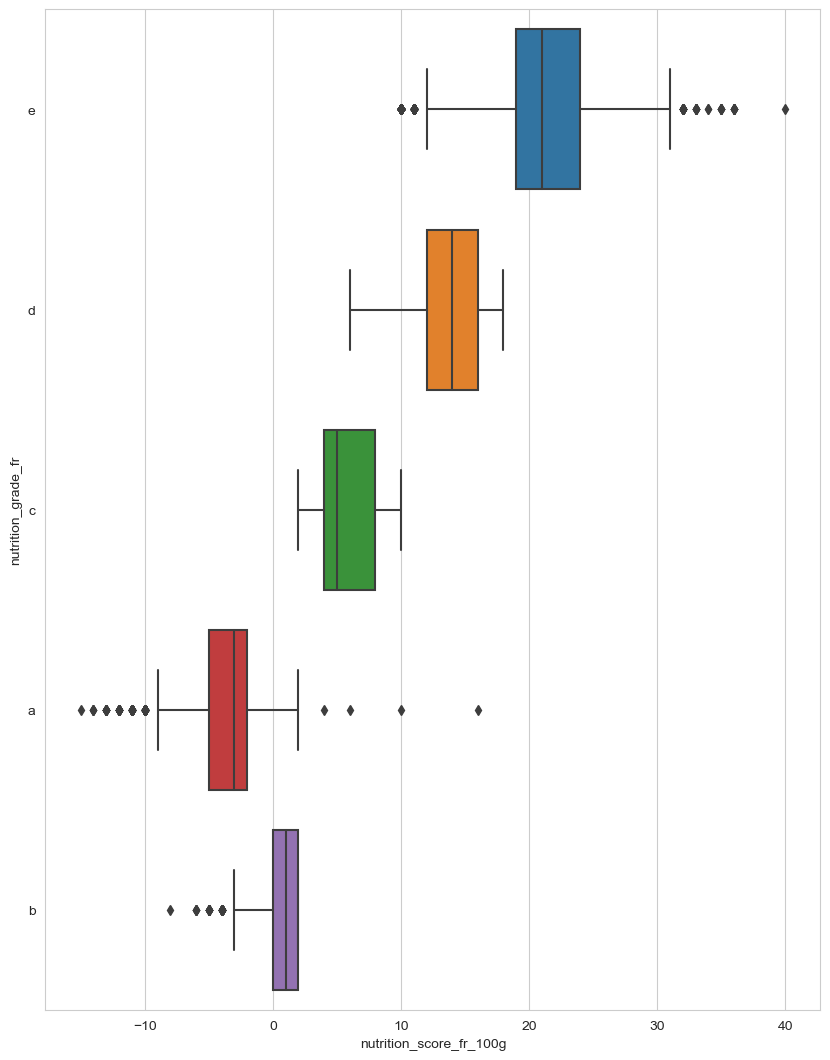

In [8]:
plt.figure(figsize=[10,13])
sns.boxplot(data=data_appli, orient='h', y='nutrition_grade_fr', x='nutrition_score_fr_100g');

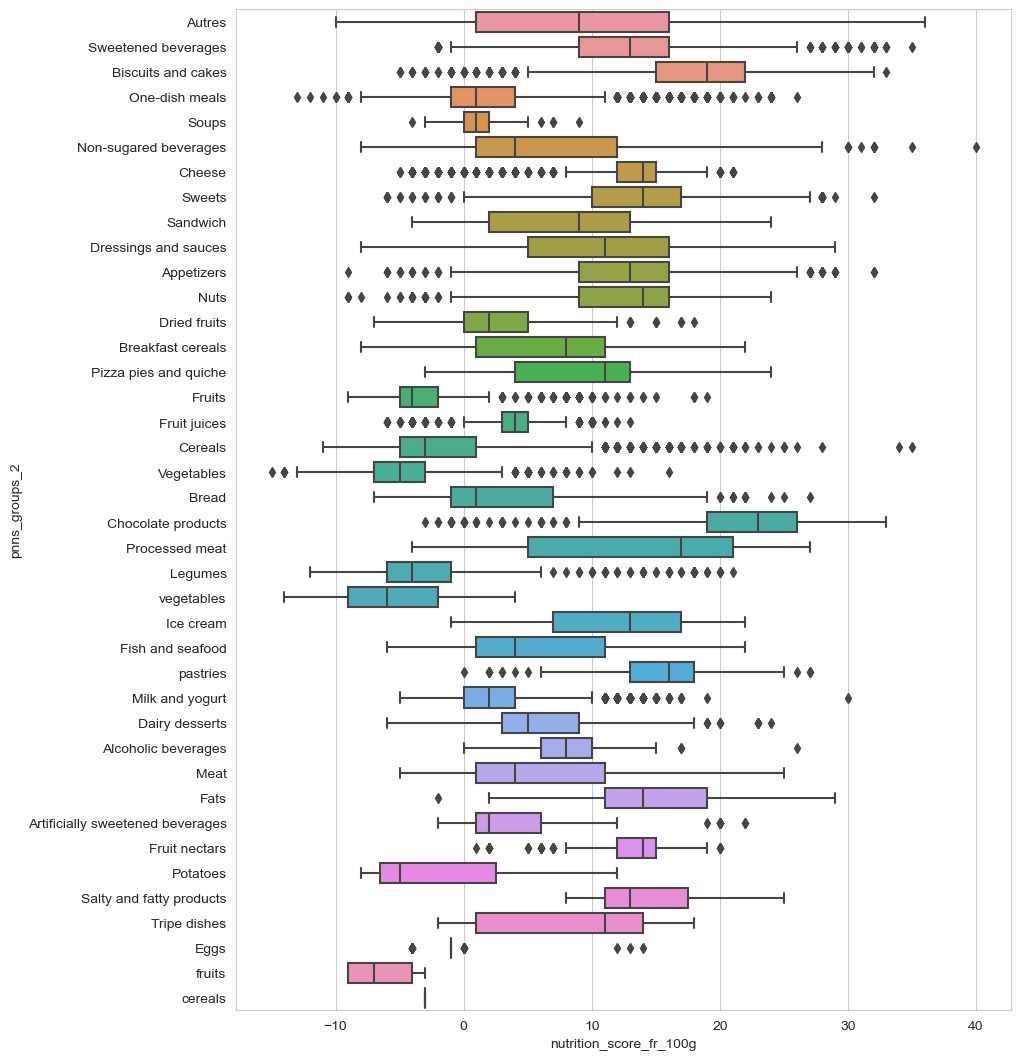

In [9]:
# Corrélation entre les groupes de produits et le nutrition score
plt.figure(figsize=[10,13])
sns.boxplot(data=data_appli, orient='h', y='pnns_groups_2', x='nutrition_score_fr_100g')
plt.ylabel('pnns_groups_2');

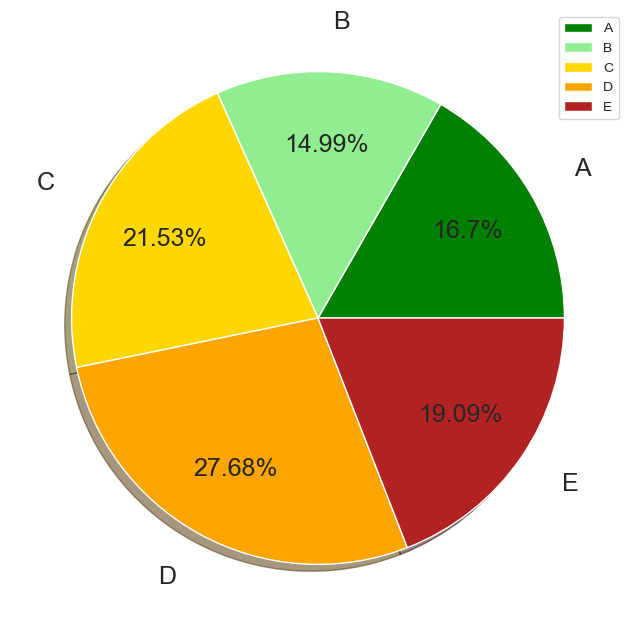

In [10]:
# Répartition du nutrition grade dans dans le DF
plt.figure(figsize = (8, 8))
x = data_fr.nutrition_grade_fr.value_counts().sort_index()
plt.pie(x, labels = ['A', 'B', 'C','D','E'],
        textprops={'fontsize': 18},
        colors = ['green', 'lightgreen', 'gold', 'orange', 'firebrick'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)
plt.legend()

## Création des tables pour l'application

### Préparation de la table Sportif

In [11]:
# Création de la table sportif
df_sportif=data_fr[['energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'pnns_groups_2','nutrition_grade_fr', 'product_name','nutrition_score_fr_100g']]

Nous ne garderons que les produits de nutrigrade A et B et avec un nutriscore inférieur à 5

In [12]:
sport = df_sportif[df_sportif['nutrition_score_fr_100g'] > 5].index
df_sportif.drop(sport, axis = 0, inplace = True)

/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_22020/2801207593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sportif.drop(sport, axis = 0, inplace = True)


In [13]:
df_sportif['nutrition_grade_fr'].value_counts()

a    10037
b     9012
c     7328
Name: nutrition_grade_fr, dtype: int64

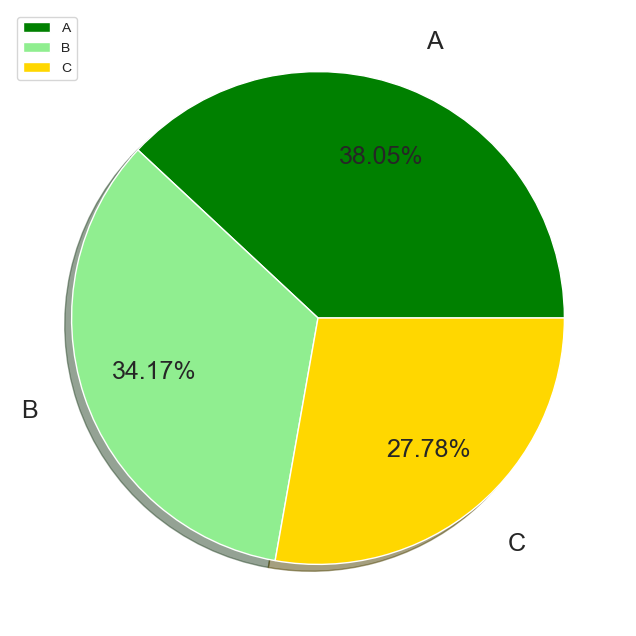

In [14]:
# Répartition du nutrition grade dans dans le DF
plt.figure(figsize = (8, 8))
x = df_sportif.nutrition_grade_fr.value_counts().sort_index()
plt.pie(x, labels = ['A', 'B', 'C'],
        textprops={'fontsize': 18},
        colors = ['green', 'lightgreen', 'gold', 'orange', 'firebrick'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)
plt.legend();

### Préparation de la table Perte de poids

In [15]:
df_perte_poids=data_fr[['energy_100g', 'fiber_100g', 'proteins_100g', 'pnns_groups_2', 'nutrition_grade_fr', 'product_name','nutrition_score_fr_100g']]


Nous ne garderons que les produits de nutrigrade A et B et avec un nutriscore inférieur à 2

In [16]:
perte = df_perte_poids[df_perte_poids['nutrition_score_fr_100g'] > 2].index
df_perte_poids.drop(perte, axis = 0, inplace = True)

/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_22020/4156176889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perte_poids.drop(perte, axis = 0, inplace = True)


In [17]:
perte_grade = df_perte_poids[df_perte_poids['nutrition_grade_fr']  == 'c' ].index
df_perte_poids.drop(perte_grade, axis = 0, inplace = True)

/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_22020/2058733017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perte_poids.drop(perte_grade, axis = 0, inplace = True)


In [18]:
df_perte_poids['nutrition_grade_fr'].value_counts()


a    10036
b     9012
Name: nutrition_grade_fr, dtype: int64

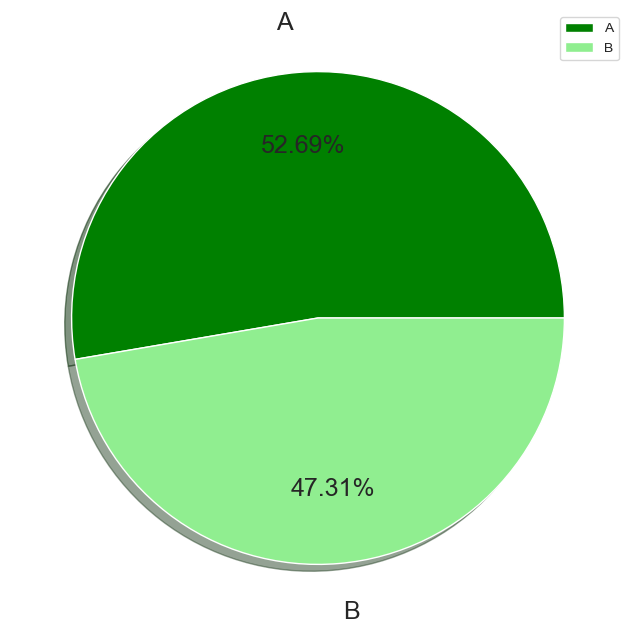

In [19]:
# Répartition du nutrition grade dans dans le DF
plt.figure(figsize = (8, 8))
x = df_perte_poids.nutrition_grade_fr.value_counts().sort_index()
plt.pie(x, labels = ['A', 'B'],
        textprops={'fontsize': 18},
        colors = ['green', 'lightgreen', 'gold', 'orange', 'firebrick'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)
plt.legend();

### Préparation de la table Prise de poids

In [20]:
df_prise_poids=data_fr[['energy_100g', 'fiber_100g', 'proteins_100g', 'pnns_groups_2','nutrition_grade_fr','fat_100g','carbohydrates_100g','sugars_100g', 'product_name','nutrition_score_fr_100g']]

Pour les produits concernant la prise de poids, il n'est pas question de délaisser les produits les plus sains, en revanche, il faut aussi conserver des produits riches, mais nous ecarterons les produits les moins biens notés.
Nous ne garderons que les produits ayant un nutriscore inférieur à 18 et de nutrigrade inférieur à E

In [21]:
prise = df_prise_poids[df_prise_poids['nutrition_score_fr_100g'] > 18].index
df_prise_poids.drop(prise, axis = 0, inplace = True)

/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_22020/3603457841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prise_poids.drop(prise, axis = 0, inplace = True)


In [22]:
prise_grade = df_prise_poids[df_prise_poids['nutrition_grade_fr']  == 'e' ].index
df_prise_poids.drop(prise_grade, axis = 0, inplace = True)

/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_22020/524393528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prise_poids.drop(prise_grade, axis = 0, inplace = True)


In [23]:
df_prise_poids['nutrition_grade_fr'].value_counts()

d    16642
c    12943
a    10040
b     9012
Name: nutrition_grade_fr, dtype: int64

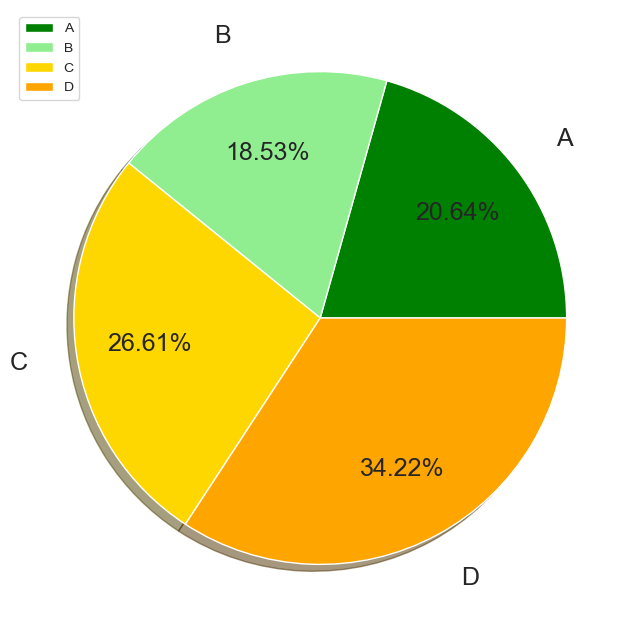

In [24]:
# Répartition du nutrition grade dans dans le DF
plt.figure(figsize = (8, 8))
x = df_prise_poids.nutrition_grade_fr.value_counts().sort_index()
plt.pie(x, labels = ['A', 'B', 'C', 'D'],
        textprops={'fontsize': 18},
        colors = ['green', 'lightgreen', 'gold', 'orange', 'firebrick'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)
plt.legend();


### Préparation de la table Neutre

In [25]:
df_neutre=data_fr[['energy_100g', 'fiber_100g', 'proteins_100g', 'pnns_groups_2','nutrition_grade_fr','fat_100g','carbohydrates_100g','sugars_100g', 'product_name', 'nutrition_score_fr_100g']]

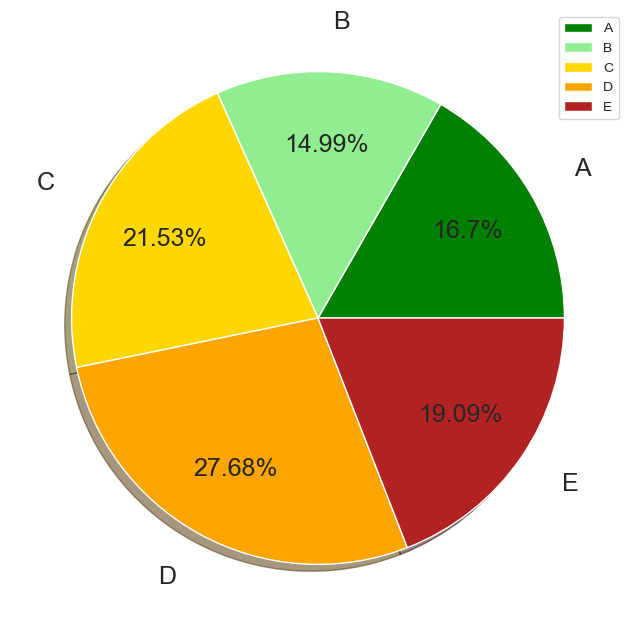

In [26]:
# Répartition du nutrition grade dans dans le DF
plt.figure(figsize = (8, 8))
x = df_neutre.nutrition_grade_fr.value_counts().sort_index()
plt.pie(x, labels = ['A', 'B', 'C', 'D', 'E'],
        textprops={'fontsize': 18},
        colors = ['green', 'lightgreen', 'gold', 'orange', 'firebrick'],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)
plt.legend();

Nous conservons l'intégralité des données pour cette table

## Anova des tables

### Anova du dataframe Sportif

In [27]:
#On crée d'abord un modèle en fitant nos données
res_energy = smf.ols('energy_100g ~ nutrition_grade_fr', data = df_sportif).fit()
res_sugars = smf.ols('sugars_100g ~ nutrition_grade_fr', data = df_sportif).fit()
res_fiber = smf.ols('fiber_100g ~ nutrition_grade_fr', data = df_sportif).fit()
res_proteins = smf.ols('proteins_100g ~ nutrition_grade_fr', data = df_sportif).fit()

#On calcul l'anova
table_energy = sm.stats.anova_lm(res_energy)
table_sugars = sm.stats.anova_lm(res_sugars)
table_fiber = sm.stats.anova_lm(res_fiber)
table_proteins = sm.stats.anova_lm(res_proteins)

#On affiche le résultat
print('Anova NutritionGrade VS Energy:','\n' ,table_energy)
print('---------------------------\n')
print('Anova NutritionGrade VS Sugars:','\n' ,table_sugars)
print('---------------------------\n')
print('Anova NutritionGrade VS Fiber:','\n' ,table_fiber)
print('---------------------------\n')
print('Anova NutritionGrade VS Proteins:','\n' ,table_proteins)
print('---------------------------\n')

Anova NutritionGrade VS Energy: 
                          df       sum_sq      mean_sq          F        PR(>F)
nutrition_grade_fr      2.0  1.10767e+07  5.53835e+06  408.74435  1.51412e-175
Residual            26374.0  3.57359e+08  1.35497e+04        NaN           NaN
---------------------------

Anova NutritionGrade VS Sugars: 
                          df       sum_sq      mean_sq          F        PR(>F)
nutrition_grade_fr      2.0  2.72656e+04  13632.78224  321.94088  7.28260e-139
Residual            26374.0  1.11682e+06     42.34561        NaN           NaN
---------------------------

Anova NutritionGrade VS Fiber: 
                          df        sum_sq      mean_sq           F  PR(>F)
nutrition_grade_fr      2.0   55632.71353  27816.35677  1548.89067     0.0
Residual            26374.0  473647.75815     17.95889         NaN     NaN
---------------------------

Anova NutritionGrade VS Proteins: 
                          df       sum_sq     mean_sq          F       PR(>F)


### Anova du dataframe Perte de poids

In [28]:
#On crée d'abord un modèle en fitant nos données
res_energy = smf.ols('energy_100g ~ nutrition_grade_fr', data = df_perte_poids).fit()
res_fiber = smf.ols('fiber_100g ~ nutrition_grade_fr', data = df_perte_poids).fit()
res_proteins = smf.ols('proteins_100g ~ nutrition_grade_fr', data = df_perte_poids).fit()

#On calcul l'anova
table_energy = sm.stats.anova_lm(res_energy)
table_fiber = sm.stats.anova_lm(res_fiber)
table_proteins = sm.stats.anova_lm(res_proteins)

#On affiche le résultat
print('Anova NutritionGrade VS Energy:','\n' ,table_energy)
print('---------------------------\n')
print('Anova NutritionGrade VS Fiber:','\n' ,table_fiber)
print('---------------------------\n')
print('Anova NutritionGrade VS Proteins:','\n' ,table_proteins)
print('---------------------------\n')

Anova NutritionGrade VS Energy: 
                          df       sum_sq      mean_sq          F        PR(>F)
nutrition_grade_fr      1.0  8.84852e+06  8.84852e+06  570.02623  3.68261e-124
Residual            19046.0  2.95651e+08  1.55230e+04        NaN           NaN
---------------------------

Anova NutritionGrade VS Fiber: 
                          df        sum_sq      mean_sq           F  \
nutrition_grade_fr      1.0   30782.86758  30782.86758  1291.50256   
Residual            19046.0  453959.99346     23.83493         NaN   

                          PR(>F)  
nutrition_grade_fr  1.03146e-273  
Residual                     NaN  
---------------------------

Anova NutritionGrade VS Proteins: 
                          df       sum_sq      mean_sq          F       PR(>F)
nutrition_grade_fr      1.0  1.81571e+04  18157.11952  345.47728  1.94186e-76
Residual            19046.0  1.00099e+06     52.55662        NaN          NaN
---------------------------



### Anova du dataframe Prise de poids

In [29]:
#On crée d'abord un modèle en fitant nos données
res_energy = smf.ols('energy_100g ~ nutrition_grade_fr', data = df_prise_poids).fit()
res_fiber = smf.ols('fiber_100g ~ nutrition_grade_fr', data = df_prise_poids).fit()
res_proteins = smf.ols('proteins_100g ~ nutrition_grade_fr', data = df_prise_poids).fit()
res_carbohydrates = smf.ols('carbohydrates_100g ~ nutrition_grade_fr', data = df_prise_poids).fit()
res_sugars = smf.ols('sugars_100g ~ nutrition_grade_fr', data = df_prise_poids).fit()
res_fat = smf.ols('fat_100g ~ nutrition_grade_fr', data = df_prise_poids).fit()

#On calcul l'anova
table_energy = sm.stats.anova_lm(res_energy)
table_fiber = sm.stats.anova_lm(res_fiber)
table_proteins = sm.stats.anova_lm(res_proteins)
table_carbohydrates = sm.stats.anova_lm(res_carbohydrates)
table_sugars = sm.stats.anova_lm(res_sugars)
table_fat = sm.stats.anova_lm(res_fat)

#On affiche le résultat
print('Anova NutritionGrade VS Energy:','\n' ,table_energy)
print('---------------------------\n')
print('Anova NutritionGrade VS Fiber:','\n' ,table_fiber)
print('---------------------------\n')
print('Anova NutritionGrade VS Proteins:','\n' ,table_proteins)
print('---------------------------\n')
print('Anova NutritionGrade VS carbohydrates:','\n' ,table_carbohydrates)
print('---------------------------\n')
print('Anova NutritionGrade VS sugars:','\n' ,table_sugars)
print('---------------------------\n')
print('Anova NutritionGrade VS fat:','\n' ,table_fat)
print('---------------------------\n')

Anova NutritionGrade VS Energy: 
                          df       sum_sq      mean_sq           F  PR(>F)
nutrition_grade_fr      3.0  3.12467e+08  1.04156e+08  4846.07767     0.0
Residual            48633.0  1.04526e+09  2.14928e+04         NaN     NaN
---------------------------

Anova NutritionGrade VS Fiber: 
                          df        sum_sq      mean_sq         F  PR(>F)
nutrition_grade_fr      3.0   44353.53066  14784.51022  875.2398     0.0
Residual            48633.0  821506.38563     16.89195       NaN     NaN
---------------------------

Anova NutritionGrade VS Proteins: 
                          df       sum_sq      mean_sq          F        PR(>F)
nutrition_grade_fr      3.0  7.48579e+04  24952.62954  408.26583  5.93468e-262
Residual            48633.0  2.97238e+06     61.11858        NaN           NaN
---------------------------

Anova NutritionGrade VS carbohydrates: 
                          df       sum_sq       mean_sq          F  \
nutrition_grade_fr    

### Anova du dataframe Neutre

In [30]:
#On crée d'abord un modèle en fitant nos données
res_energy = smf.ols('energy_100g ~ nutrition_grade_fr', data = df_neutre).fit()
res_fiber = smf.ols('fiber_100g ~ nutrition_grade_fr', data = df_neutre).fit()
res_proteins = smf.ols('proteins_100g ~ nutrition_grade_fr', data = df_neutre).fit()
res_carbohydrates = smf.ols('carbohydrates_100g ~ nutrition_grade_fr', data = df_neutre).fit()
res_sugars = smf.ols('sugars_100g ~ nutrition_grade_fr', data = df_neutre).fit()
res_fat = smf.ols('fat_100g ~ nutrition_grade_fr', data = df_neutre).fit()

#On calcul l'anova
table_energy = sm.stats.anova_lm(res_energy)
table_fiber = sm.stats.anova_lm(res_fiber)
table_proteins = sm.stats.anova_lm(res_proteins)
table_carbohydrates = sm.stats.anova_lm(res_carbohydrates)
table_sugars = sm.stats.anova_lm(res_sugars)
table_fat = sm.stats.anova_lm(res_fat)

#On affiche le résultat
print('Anova NutritionGrade VS Energy:','\n' ,table_energy)
print('---------------------------\n')
print('Anova NutritionGrade VS Fiber:','\n' ,table_fiber)
print('---------------------------\n')
print('Anova NutritionGrade VS Proteins:','\n' ,table_proteins)
print('---------------------------\n')
print('Anova NutritionGrade VS carbohydrates:','\n' ,table_carbohydrates)
print('---------------------------\n')
print('Anova NutritionGrade VS sugars:','\n' ,table_sugars)
print('---------------------------\n')
print('Anova NutritionGrade VS fat:','\n' ,table_fat)
print('---------------------------\n')

Anova NutritionGrade VS Energy: 
                          df       sum_sq      mean_sq           F  PR(>F)
nutrition_grade_fr      4.0  6.74412e+08  1.68603e+08  6988.27388     0.0
Residual            60111.0  1.45027e+09  2.41266e+04         NaN     NaN
---------------------------

Anova NutritionGrade VS Fiber: 
                          df        sum_sq      mean_sq          F  PR(>F)
nutrition_grade_fr      4.0   52716.29800  13179.07450  844.44915     0.0
Residual            60111.0  938135.04813     15.60671        NaN     NaN
---------------------------

Anova NutritionGrade VS Proteins: 
                          df       sum_sq      mean_sq          F        PR(>F)
nutrition_grade_fr      4.0  7.49191e+04  18729.77441  310.25542  1.10731e-264
Residual            60111.0  3.62883e+06     60.36889        NaN           NaN
---------------------------

Anova NutritionGrade VS carbohydrates: 
                          df       sum_sq       mean_sq          F  PR(>F)
nutrition_grad